<div style="border-radius: 15px; border: 3px solid navy; padding: 15px; ">
<b> Привет! Меня зовут Денис Иванов. </b> 
<br> Сегодня я буду проверять твой проект. Попробую помочь тебе сделать его еще лучше!
<br> Если не против, то дальнейшее общение будет проходить на «ты». Если это неприемлемо, то обязательно напиши мне в комментариях — мы перейдем на «вы».
<br> Также сразу хочу обратить внимание на цветовую разметку.
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Так обозначены отличные решения и идеи, которые можно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Так обозначено то, что можно сделать лучше или оптимизировать.
</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
❌ Так  обозначено то, что требует исправления. Работа не может быть принята с красными комментариями.
</div>
    
<br> Пожалуйста, не перемещай, не изменяй и не удаляй мои коментарии, так как они повышают качество повторного ревью.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
    
<br> Также будет очень хорошо, если ты будешь помечать свои действия следующим образом.
    
<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента:</b> ...
</div>
    
<hr style="border-width: 3px;">
    
<b>Полезные ссылки:</b>

* Если тебя заинтересовал процесс создания и применения нейронных сетей, то могу предложить обратить внимание на следующие курсы: 
    - <a href='https://stepik.org/course/401/info'>Нейронные сети</a> — математика и  алгоритмы, лежащие в основе обучения нейронных сетей,
    - <a href='https://dls.samcs.ru'>DLS</a> — теория и практика глубокого обучения и нейронных сетей на PyTorch.
* Если удобнее читать, то вот довольно познавательная книга <a href='https://vk.com/wall-203365865_1152'>«PyTorch. Освещая глубокое обучение»</a>.
    
<hr style="border-width: 3px;">
    
<b>Общее впечатление</b>
* Большое спасибо за проделанную работу.
* Радует, что проект хорошо структурирован.
* Я оставил несколько советов. Пожалуйста, обрати на них внимание.
* Проект принят.
</div>

# Определение возраста покупателей

## Исследовательский анализ данных

### Установка пакетов

In [1]:
import sys

!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install --upgrade Pillow
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

from ydata_profiling import ProfileReport

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Загрузка и первичный анализ данных 

In [3]:
df = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
profile = ProfileReport(df, title="Faces")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [6]:
df.describe()

real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Молодец, что не забываешь о методах первичного анализа данных. Знание статистик данных позволяет работать с ними более продуктивно.
</div>

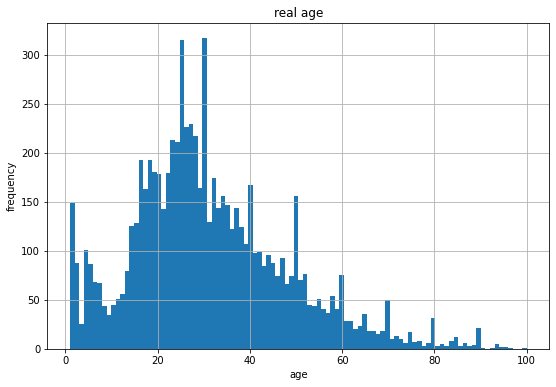

In [7]:
df['real_age'].hist(bins=100, figsize=(9,6))
plt.grid(True)
plt.title('real age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

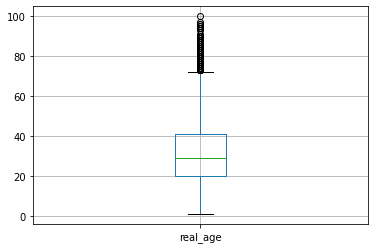

In [8]:
df.boxplot(column=['real_age']);

### Несколько изображений

In [9]:
preview_datagen = ImageDataGenerator(rescale=1./255)
preview_gen_flow = preview_datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        label_mode='int',
        target_size=(224, 224),
        batch_size=10,
        class_mode='raw',
        seed=2707) 

Found 7591 validated image filenames.


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ `ImageDataGenerator` инициализирован верно, однако обрати внимание на наименование переменных:
- `train_gen_flow` — данное название наводит на мысль о тренировочной выборке, что в дальнейшем может запутать как и тебя, так и читающего твой код коллегу. Не стоит забывать, что основной принцип хорошего именования — имена должны быть содержательными (полностью отражать своё назначение).
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента v1:</b>

Исправил
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Отлично. Молодец, что проходишься по рекомендациям.
</div>

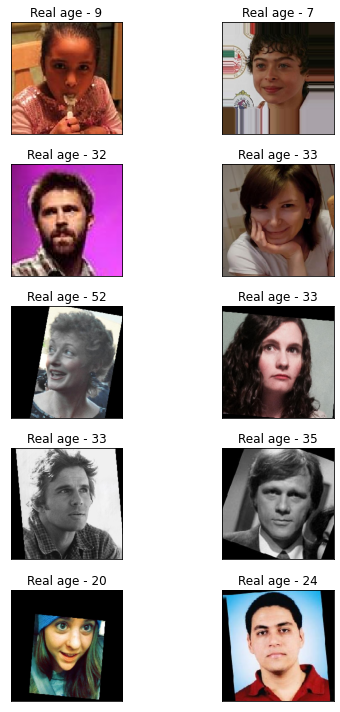

In [10]:
first_look = preview_gen_flow[0][0]
age = preview_gen_flow[0][1]

fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(5, 2, i+1)
    plt.imshow(first_look[i])
    plt.title(f'Real age - {age[i]}')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Отлично, что выведены изображения.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

⚠️ Имеет смысл указать в `title` возраст, так сразу можно оценить корректность разметки.  
</div> 

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента v1:</b>

Добавил
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Отлично.
</div>

### Выводы по предобработке
- датасет содержит 7591 изображение, классифицированное по возрасту от 1 года до 100 лет
- датасет не имеет пропусков
- датасет не имеет аномалий или неадекватных значений
- предварительный просмотр фотографий и разметки показал, что по крайней мере часть датасета размечена адекватно
- явный перекос в сторону меньшего возраста (среднее - 31 год) скорее всего связано с тем, что это фотографии из соцсетей
- пик на графике для класаа "1 год" связан с тем, что вероятно, дети в возрасте меньше года также туда попадают
- в целом - младенцев чаще фотографируют и выкладывают их фотографии, чем младших школьников, что вполне понятно
- характерные пики в районе 30, 40, 50, 60, 70, 80, 90 лет могут объясняться тем, что датасет размечался вручную "на глаз", либо тем, что люди чаще фотографируются и выкладывают фотографии знаменательных дат (юбилеев). Пик 25 лет - это скорее всего окончание университета.
- **можно ожидать, что нейросеть, обученная на таком датасете, хорошо научится определять возраст молодых людей, а также, возможно, будет стремиться округлить возраст до кратного 10 числа**

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

⚠️ Верно подмечено, что в годах кратных 5 присутствуют аномалии. Только смотри, в данном случае имеет смысл предположение, что разметка изображений проводилась руками и возраст определялся не точно, а как говорится, "на глаз".
</div> 

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента v1:</b>

Согласен, дополнил выводы
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Верные наблюдения. Действительно, малое количество данных для определенной категории (в данном случае для пожилых людей) может привести к смещению модели в сторону более представленных категорий (20-40 лет). Кроме того, модель может обучиться на основе характеристик данных категорий, которые не будут работать для других возрастов, что также может привести к низкому качеству предсказаний.
</div>

## Обучение модели

### Функция для загрузки обучающей выборки

In [11]:
def load_train(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    train_datagen_flow = datagen.flow_from_dataframe(dataframe=pd.read_csv(path+'labels.csv'),
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=2807, 
    subset='training') 
    
    return train_datagen_flow 

### Функция для загрузки тестовой выборки

In [12]:
def load_test(path):
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    test_datagen_flow = datagen.flow_from_dataframe(dataframe=pd.read_csv(path+'labels.csv'),
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=2807, 
    subset='validation') 
    
    return test_datagen_flow

### Функция для обучения модели

In [13]:
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=len(train_data),
              validation_steps=len(test_data),
              verbose=2)
    return model

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Функции для загрузки данных и функция обучения определены верно.
</div>

### Keras, архитектура LeNet, 8 слоев: библиотеки+модель+результат

```python
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def create_model(input_shape):    
    optimizer = Adam(learning_rate=.00002)
    model = Sequential()
    model.add(Conv2D(filters=6,
                 kernel_size=(5, 5),
                 padding='same',
                 activation='relu',
                 input_shape=(input_shape)))
    model.add(AvgPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='valid',
                 activation="relu"))
    model.add(AvgPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=26, kernel_size=(5, 5), padding='valid',
                 activation="relu"))
    model.add(AvgPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mean_squared_error', 
              optimizer=optimizer, metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])
    return model
```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Молодец, что в качестве baseline модели используешь `LeNet`. Данная нейронная сеть достигла хороших результатов в свое время, особенно для классификации рукописных цифр. Однако, задача определения возраста является более сложной и требует учета различных факторов, таких как морфологические черты, текстуры кожи и другие признаки старения. Более современные модели, например, глубокие сверточные нейронные сети (CNN), могут достичь более точных результатов в таких задачах. 

Еще обрати внимание на оптимизатор — ты определяешь `optimizer = Adam(learning_rate=.00002)`, но в модели используешь 'adam', который по умолчанию имеет другие настройки learning_rate.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента v1:</b>

Да, с adam нехорошо получилось, поправил
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Ок.
</div>

```
Train for 178 steps, validate for 60 steps

Epoch 1/10
2023-07-31 05:46:45.966867: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-07-31 05:46:46.479155: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

178/178 - 53s - loss: 860.7362 - mean_absolute_error: 23.8789 - val_loss: 348.3954 - val_mean_absolute_error: 14.7753

Epoch 2/10
178/178 - 39s - loss: 360.8322 - mean_absolute_error: 14.7510 - val_loss: 334.2698 - val_mean_absolute_error: 14.4236

Epoch 3/10
178/178 - 39s - loss: 350.7961 - mean_absolute_error: 14.5129 - val_loss: 327.1236 - val_mean_absolute_error: 14.3097

Epoch 4/10
178/178 - 39s - loss: 340.0586 - mean_absolute_error: 14.2674 - val_loss: 313.7084 - val_mean_absolute_error: 13.9375

Epoch 5/10
178/178 - 38s - loss: 329.5300 - mean_absolute_error: 14.0136 - val_loss: 310.9035 - val_mean_absolute_error: 14.0278

Epoch 6/10
178/178 - 38s - loss: 312.2362 - mean_absolute_error: 13.6503 - val_loss: 288.9090 - val_mean_absolute_error: 13.4400

Epoch 7/10
178/178 - 36s - loss: 299.6182 - mean_absolute_error: 13.3503 - val_loss: 280.9953 - val_mean_absolute_error: 13.1255

Epoch 8/10
178/178 - 36s - loss: 295.2385 - mean_absolute_error: 13.2535 - val_loss: 280.9388 - val_mean_absolute_error: 13.2982

Epoch 9/10
178/178 - 36s - loss: 291.9873 - mean_absolute_error: 13.1680 - val_loss: 281.8606 - val_mean_absolute_error: 13.3877

Epoch 10/10
178/178 - 36s - loss: 289.4507 - mean_absolute_error: 13.1040 - val_loss: 272.5858 - val_mean_absolute_error: 12.9673

WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']

60/60 - 9s - loss: 272.5858 - mean_absolute_error: 12.9673

Test MAE: 12.9673

```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Хотя значение целевой метрики качества и не достигло требуемого порога, все равно тобой получены отличные результаты с учетом простоты тестируемой нейронной сети.
</div>

### Keras, архитектура ResNet50, предобученная на ImageNet: библиотеки+модель+результат

```python
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50

def create_model(input_shape):
 
    optimizer = Adam(learning_rate=.00005)
    backbone = ResNet50(input_shape=(224, 224, 3),
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mean_squared_error', 
              optimizer=optimizer, metrics=[tensorflow.keras.metrics.MeanAbsoluteError()])
    return model
```

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Обрати внимание на оптимизатор — ты определяешь `optimizer = Adam(learning_rate=.00005)`, но в модели используешь 'adam', который по умолчанию имеет другие настройки learning_rate.   
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента v1:</b>

поправил
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Ок.
</div>

```
Train for 178 steps, validate for 60 steps

Epoch 1/10
2023-07-31 06:35:18.485109: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2023-07-31 06:35:23.011620: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

178/178 - 125s - loss: 305.2767 - mean_absolute_error: 12.5831 - val_loss: 914.4756 - val_mean_absolute_error: 25.5287

Epoch 2/10
178/178 - 56s - loss: 63.4868 - mean_absolute_error: 6.0291 - val_loss: 911.6777 - val_mean_absolute_error: 25.4882

Epoch 3/10
178/178 - 56s - loss: 30.8564 - mean_absolute_error: 4.2670 - val_loss: 548.9585 - val_mean_absolute_error: 18.3979

Epoch 4/10
178/178 - 55s - loss: 19.3555 - mean_absolute_error: 3.4137 - val_loss: 179.5462 - val_mean_absolute_error: 10.0750

Epoch 5/10
178/178 - 53s - loss: 14.9535 - mean_absolute_error: 3.0308 - val_loss: 85.2098 - val_mean_absolute_error: 6.9939

Epoch 6/10
178/178 - 38s - loss: 13.1774 - mean_absolute_error: 2.8348 - val_loss: 82.5612 - val_mean_absolute_error: 6.8621

Epoch 7/10
178/178 - 52s - loss: 12.5201 - mean_absolute_error: 2.7268 - val_loss: 106.0750 - val_mean_absolute_error: 8.1429

Epoch 8/10
178/178 - 50s - loss: 12.0768 - mean_absolute_error: 2.6704 - val_loss: 82.9103 - val_mean_absolute_error: 7.0565

Epoch 9/10
178/178 - 47s - loss: 10.8921 - mean_absolute_error: 2.5572 - val_loss: 72.4246 - val_mean_absolute_error: 6.4896

Epoch 10/10
178/178 - 47s - loss: 9.5244 - mean_absolute_error: 2.3452 - val_loss: 72.5656 - val_mean_absolute_error: 6.4571

WARNING:tensorflow:sample_weight modes were coerced from

  ...

    to  

  ['...']

60/60 - 10s - loss: 72.5656 - mean_absolute_error: 6.4571

Test MAE: 6.4571

```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Цель достигнута. В статье о датасете, с которым мы работаем, значение MAE равно 5.4, поэтому тобой получены достаточно хорошие результаты.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Вопрос студента v1:</b>

**В качестве бонуса попытался сделать то же самое с использованием PyTorch**

Модель обучал не на платформе, а в colab. Получилось так себе, но там и сетку довольно простую собрал.
    
Собственно, вопрос. Пока выглядит так, что у Keras ниже порог входа, а у PyTorch больше возможностей. В каких случаях что лучше использовать, что посоветуешь?
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Оба фреймворка довольно мощные инструменты для разработки нейронных сетей. Keras — это высокоуровневый фреймворк, построенный поверх более низкоуровневой библиотеки TensorFlow. Он предоставляет простой и интуитивно понятный API, что делает его отличным выбором для начинающих и быстрого прототипирования моделей. PyTorch — это более низкоуровневый фреймворк, который обеспечивает более гибкий подход к разработке моделей. Он позволяет более тонкую настройку модели и более глубокое погружение во внутреннюю работу нейронных сетей. Если ты предпочитаешь простоту использования и быстрое прототипирование моделей, то Keras может быть лучшим выбором. Если же необходим больший контроль и гибкость при разработке моделей, то рекомендуется выбрать PyTorch.
    
По ссылке в начале ноутбука курс по CV от DLS, обучение проходит с использованием PyTorch. Если нет трудностей с обучением и нравится работать с нейронными сетями, то PyTorch все-таки более предпочтителен.
</div>

### Попытки сделать то же самое в PyTorch

```python

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms, utils
from torchvision.transforms import Resize
from torchvision.io import read_image
from torch import nn
from skimage import io

import warnings
warnings.filterwarnings("ignore")

plt.ion()

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class Faces(Dataset):
    def __init__(self, annotations_file, img_dir, transform, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file).drop(['apparent_age', 'worker_age', 'worker_gender'], axis=1)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path).to(torch.float32)
        label = np.float32(self.img_labels.iloc[idx, 1])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

transformer = Resize((225, 225))
face_dataset = Faces(annotations_file='sample_data/gt_train.csv',
                                    img_dir='sample_data/img/', transform=transformer)
train_size = int(0.75 * len(face_dataset))
test_size = len(face_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(face_dataset, [train_size, test_size])

look_flow = DataLoader(face_dataset, batch_size=10, shuffle=True, num_workers=1,
                           pin_memory=True)

fig = plt.figure(figsize=(10,10))
for IMG, age in (look_flow):
    for i in range(10):
        fig.add_subplot(5, 2, i+1)
        plt.imshow(IMG[i].to(torch.uint8).permute(1, 2, 0))
        plt.title(f'Real age - {age[i]}')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        #print(IMG[i].dtype)
        #print(age[i].dtype)
        #print(f"Type of X: {np.dtype(IMG[i])}")
        #print(f"Type of age: {np.dtype(age)}")
    break

train_flow = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=1,
                           pin_memory=True)
test_flow = DataLoader(test_dataset, batch_size=8, shuffle=True, num_workers=1,
                           pin_memory=True)

class MyNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 6, (5,5)),
            nn.ReLU(),
            nn.AvgPool2d(5, stride=1),
            nn.Conv2d(6, 16, (5,5)),
            nn.ReLU(),
            nn.AvgPool2d(5, stride=1),
            nn.Flatten(),
            nn.LazyLinear(1),
            nn.ReLU()
        )
        #self.float()

    def forward(self, x):
        return self.layers(x)

model = MyNN().to(device)
print(model)

model = MyNN()
loss_t = nn.MSELoss()
loss_v = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

n_epochs = 10
for epoch in range(n_epochs):
    train_features, train_labels = next(iter(train_flow))
    y_pred = model(train_features)
    loss = loss_t(y_pred, train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    MAE = 0
    valid_features, valid_labels = next(iter(test_flow))
    y_pred = model(valid_features)
    MAE = loss_v(y_pred, valid_labels)

    print(f'Epoch: {epoch} --- MAE {MAE}')
```

```
Epoch: 0 --- MAE 1168.4100341796875
Epoch: 1 --- MAE 369.6968994140625
Epoch: 2 --- MAE 28.125
Epoch: 3 --- MAE 31.625
Epoch: 4 --- MAE 19.25
Epoch: 5 --- MAE 29.125
Epoch: 6 --- MAE 30.25
Epoch: 7 --- MAE 24.875
Epoch: 8 --- MAE 30.625
Epoch: 9 --- MAE 24.5
```

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Молодец. Нейронная сеть, конечно, довольно простая, но суть построения архитектуры и обучения с использованием PyTorch ты уловил верно. 
</div>

## Анализ обученной модели

В ходе исследования было проверено 3 модели:

| Модель | МАЕ | Вывод |
|---|---|---|
|Сверточная нейросеть с 8 слоями по архитектуре LeNet|13,0|Не удовлетворяет требованиям|
|ResNet50, предобученная на датасете ImageNet|6,5|Удовлетворяет требованиям|
|Сверточное что-то в PyTorch|24,5|Не удовлетворяет требованиям|


**Модель, удовлетворяющая требованиям (MAE <= 8):**
- ✅ пригодна для системы рекомендаций товаров на основе возрастной группы покупателя;
- ❌ непригодна для проверки добросовестности кассира, продающего алкоголь (требуемая точность определения возраста может составлять 1 месяц). Это я как человек, который в свои 30+ пиво без паспорта купить не может, говорю:)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>
    
⚠️ Можно было еще сказать несколько слов о бизнесе. Позволяет ли полученная модель решить поставленные бизнесом задачи?
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий студента v1:</b>

Выводы дополнены
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Верно. С учетом полученных результатов можно рекомендовать использовать данную модель для выполнения первой поставленной задачи — анализировать покупки и предлагать товары, которые могут заинтересовать покупателей определенной возрастной группы.
    
Что касается второй задачи — контролировать добросовестность кассиров при продаже алкоголя — с учетом полученного MAE, модель не покажет хороших результатов на практике.
</div>

<div class="alert-info"> 
<b>Вопрос студента v0 </b>

Я пробовал ResNet50 и без предобучения - результат хуже. Вопрос: казалось бы, классификация изображений из ImageNet не очень подходит к решаемой задаче регрессии. Так почему предобученная модель работает лучше?

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Смотри, предобученные на ImageNet модели, такие как `ResNet50`, обучаются на огромном наборе изображений различных классов. Когда мы говорим о "замороженной верхушке" и "дообучении", это означает, что предобученная модель `ResNet50` используется как основа, и только последний слой или несколько верхних слоев переобучаются на конкретную задачу определения возраста. При этом остальные слои остаются неизменными. Такой подход имеет несколько преимуществ:
    
* Во-первых, предобученная модель уже обладает хорошей способностью распознавания различных общих низкоуровневых и высокоуровневых признаков изображений, и некоторые из этих признаков могут быть связаны с возрастом, например, модель может находить общие черты и шаблоны, относящиеся к форме лица, структуре кожи, текстуре волос. При дообучении мы можем настроить эти признаки, чтобы лучше соответствовать конкретной задаче.

* Во-вторых, использование предобученной модели позволяет значительно снизить объем требуемых для обучения данных. Это позволяет достигнуть хорошей производительности даже при ограниченном количестве изображений для дообучения, как в текущей задаче.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера:</b>

✔️ Спасибо за работу, у тебя получился отличный проект. Если есть вопросы, то можешь задать их, если нет, то присылай назад и я его приму.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>Комментарий ревьюера 2:</b>

✔️ Проект принят. Удачи в дальнейшей учебе!
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы